![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
## MAM4 - EDP1
# TP 2 - Équation d'advection

## Exercice 1. Schéma explicite

On résout numériquement l'équation d'advection sur $\Omega:=]0,L[$ avec conditions aux limites périodiques.

$$ \left\{\begin{array}{l}
\displaystyle \frac{\partial u}{\partial t}(x,t)+V\frac{\partial
  u}{\partial x}(x,t)=0,x\in\Omega,\,t\ge 0,\\
\displaystyle u(x,0)=u_0(x),\,x\in \Omega,\\
u(0,t)=u(L,t),\,t\ge 0.
\end{array}\right. $$

Pour simplifier on a supposé que la donnée initale
est périodique de période $L$. On vérifie aisément que la
solution exacte est donnée par $u(x,t)=u_0(x-Vt)$.

On cherche à approcher numériquement la solution par le schéma *décentré amont* suivant:

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}+V\frac{u_j^n-u_{j-1}^n}{\Delta x}=0 $$ 

o\`u $u_j^n\cong u(x_j,t_n),\,0\le j\le N$, $\Delta x=L/N$,
$x_j=j\Delta x$ et $t_n = n\Delta t$. En réarrangeant les termes, on obtient

$$ u_j^{n+1}=u_j^n-\sigma(u_j^n-u_{j-1}^n) $$

o\`u $\sigma=\displaystyle\frac{V\Delta t}{\Delta x}$ est connu sous le nom de [*nombre de Courant*](https://fr.wikipedia.org/wiki/Nombre_de_Courant).
Pour approcher la condition initiale et la condition limite on écrit

$$ u_j^0=u_0(x_j),\,0\le j\le N,\, u_0^n = u_N^n,\,n\ge 0. $$

Augmenter progressivement le paramètre $\sigma$ et observer le résultat. Quelle est la valeur critique ? Constater aussi en augmentant progressivement `Nt` que la solution numérique est amortie au fil des itérations en temps (phénomène de diffusion numérique).

# Réponse exercice 1:

On observe que plus on augmente 𝜎 (en partant de 0), plus la solution devient exacte pour arriver à une solution parfaite pour 𝜎 = 1  mais que si on on a 𝜎 >1 le schéma dégénère rapidement. On peut en déduire que la valeur 1 est le point critique.
C'est quelque chose de normal en vu des condition sur 𝜎.

On observe qu'en augmentent Nt, on a de plus en plus de diffussion numérique et le schéma se déplace vers la droite.


(On observe que plus L est grand,soit la taille du domaine, plus la solution devient de moins en moins précise et si on augmente Nx, la solution devient plus précise mais les temps de calculs seront plus long.)


In [1]:
using LinearAlgebra, Plots
  
# Parameters
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 500                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 0.8                                              # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt = 45                                            # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

# Explicit scheme
u = u0
for n = 1:Nt
    uold = u
    u[2:end] = uold[2:end]-σ*(uold[2:end]-uold[1:end-1])
    u[1] = u[end]
end

uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

## Exercice 2. Schéma de Lax-Wendroff
En suivant le modèle précédent, implémenter le schéma suivant :

$$
u_j^{n+1}=u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n)+\frac{\sigma^2}{2}(u_{j+1}^n-2u_j^n+u_{j-1}^n).
$$

Dans ce nouveau script au tout début, à l'intérieur de la boucle en temps on va fixer la condition à un des bords (condition entrante) :

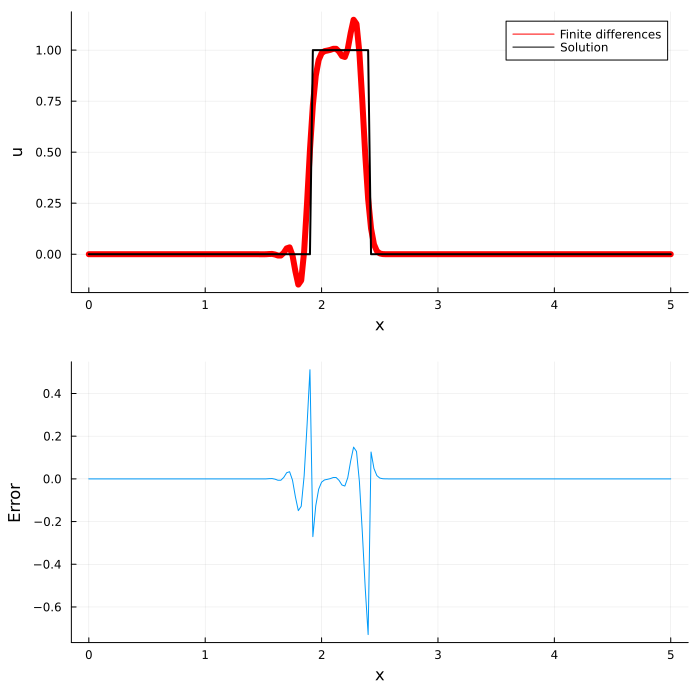

Δx: 0.025	 Δt:0.20000000000000004	 max error: 0.7294325284367419


In [68]:
# Parameters
a=time()
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 200                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 0.8            #<1 pour stabilité               # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt = 45                                             # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

u = u0
for n = 1:Nt
    uold = u
    u[2:end-1] = uold[2:end-1] - σ/2*(uold[3:end]-uold[1:end-2]) + σ^2/2*(uold[3:end]-2*uold[2:end-1]+uold[1:end-2])
    u[1] = condinit(x[1]-V*n*Δt)
    u[end]=u[1]
end

uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))
b=time()
println(b-a)

Repartir de $\sigma=0.8$ et essayer 4 possibilités du couple conditions initiale/schéma numérique. 

- Quelles conditions tirez-vous ?
- Augmenter progressivement $\sigma$ pour le schéma de Lax-Wendroff et observer. 
- Que peut-on dire de la diffusion numérique observée précédemment dans le cas du schéma décentré ?
- Le schéma de Lax-Wendroff est-il diffusif ?

# Reponse exercice 2:

-Pour le couple créneau/euler explicite, le schéma est diffusif et la diffusion numérique est importante avec une erreur de l'ordre de 10^-1(0.56).
    -Pour le couple créneau/Lax-Wendroff, le schéma est dispersif et la dispersion est importante avec une erreur de l'ordre de 10^-1(0.73).
-Pour le couple sinusoïdal/euler explicite, on observe une très faible diffusion numérique avec une erreur de l'ordre de 10^-2.
-Pour le couple sinusoïdal/Lax-Wendroff, le schéma approxime très bien la solution exacte avec une erreur de l'ordre de 10^-3.

On peut dire que les conditions initiales du schéma décentré a un impact important sur la diffusion numérique car avec une condition sinusoïdale,le schéma a une très faible diffusion par rapport à celle du créneau.

On observe que si on  augmente 𝜎 alors le phénomène de dispersion est atténué pour obtenir la solution exacte à 𝜎=1 pour le créneau.

Le schéma Lax-Wendroff n'est pas diffusif mais il est dispersif dans le cas du créneau.

## Exercice 3. Schéma de Lax-Wendroff implicite
On va changer le schéma comme suit :

$$
u_j^{n+1}=u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n)+\frac{\sigma^2}{2}(u_{j+1}^{n+1}-2u_j^{n+1}+u_{j-1}^{n+1}).
$$ 

En introduisant $W^n = (u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n))_j$ et
$U^n=(u_j^n)_j$,
le schéma s'écrit $AU^{n+1}=W^n$. On pourra utiliser la
condition de périodicité directement dans le schéma numérique afin d'éliminer $u_j^N$. On constate que le schéma est implicite : l'évaluation de $U^{n+1}$ à partir
de $U^n$ nécessite la résolution d'un système linéaire, et le coût
de l'itération sera plus élevé que dans le cas d'un
schéma explicite. Cependant le schéma n'est pas limité par la
valeur du nombre de Courant $\sigma$ ce qui permet d'utiliser des
pas de temps plus grands et donc de diminuer le nombre d'itérations associé.

Deux options sont possibles pour la boucle en temps : 
- soit résoudre le système linéaire à chaque pas de temps (factorisation, pas inversion !)
- soit factoriser la matrice $A$ une fois pour toutes avant la boucle (par exemple sous la forme $A=LU$), puis réutiliser cette factorisation.

Comparer ces différentes options pour la résolution
du systéme linéaire en observant le temps d'execution et en augmentant progressivement la taille du système à résoudre. Réaliser des expériences numériques en
faisant varier le nombre de Courant. Discuter les performances relatives des schémas implicite et explicite en termes de temps de calcul.

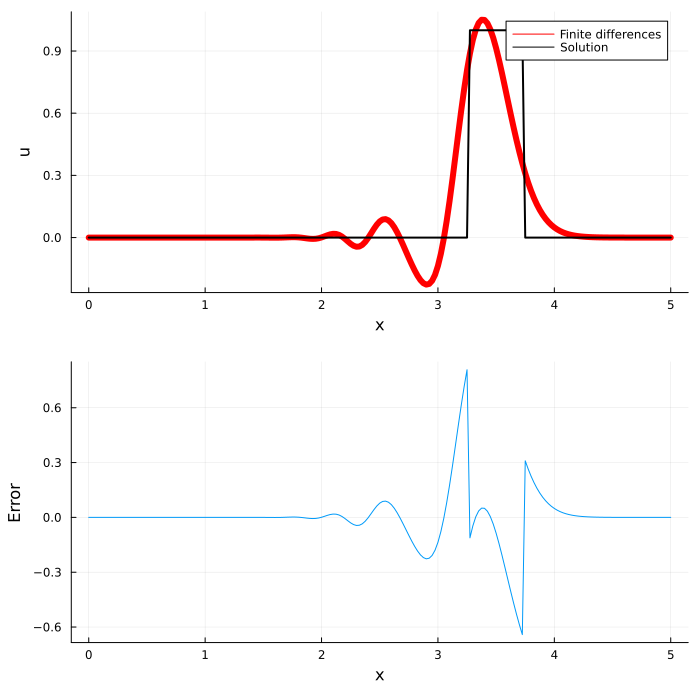

Δx: 0.025	 Δt:0.5	 max error: 0.8078322550261722
0.2869999408721924


In [81]:
# Parameters
a=time()
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 200                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 2                                             # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt = 45                                             # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

#On construit A avant la boucle en temps
A = zeros(Nx+1, Nx+1)
A[1,1]=1+σ^2
A[1,2]=-σ^2/2
A[1,end]=-σ^2/2
for i=2:Nx
    A[i,i-1]=-σ^2/2
    A[i,i]=1+σ^2
    A[i,i+1]=-σ^2/2 
end
A[end,1]=-σ^2/2
A[end,end-1]=-σ^2/2
A[end,end]=1+σ^2


w=zeros(Nx+1,1)
u=u0

#boucle en temps
for n=1:Nt
    uold=u
    w[2:end-1]= uold[2:end-1] - σ/2*(uold[3:end]-uold[1:end-2])
    w[1]=condinit(x[1]-V*n*Δt)
    w[end]=w[1]
    u=A\w
end

uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))
b=time()
println(b-a)







# Reponse exercice3:
        
        Le schéma de Lax-Wendroff implicite n'a plus de contrainte de stabilité. Le schéma est dispersif et quand σ est grand la précision diminue grandement car le pas de temps va également augmenter. Avec la condition sinusoïdale le schéma approxime très bien la solution.
        
        Le schéma de Lax-Wendroff explicite a un temps d'exécution beaucoup plus rapide que le schéma de Lax-Wendroff implicite. Avec nos valeurs on a un temps de 0.09s pour l'éxplicite  et de 0.23s pour l'implicte.(on a utilisé la fonction time pour optenir ce résultat)
        
        On peut diminuer la complexitée de l'algorithme du schéma implicite en utilisant la factorisation LU pour diminuer le temps d'éxecution.
        